### Importamos las librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Carga e integridad de datos

In [2]:
df = pd.read_excel("clustering_mailing.xlsx")

In [3]:
df

,Id,send,bounce,open,click,Total,Comprador,hour,day_of_week
0,2044163,4,0,0,0,4,0,17.000000,3.500000
1,633731,1,0,0,0,1,0,21.000000,4.000000
2,1537126,4,0,0,0,4,0,17.000000,3.500000
3,1960135,3,0,0,0,3,0,15.333333,3.333333
4,1004992,8,0,1,0,10,1,18.222222,2.000000
...,...,...,...,...,...,...,...,...,...
212287,1996785,4,0,0,0,4,0,17.000000,3.500000
212288,1485221,1,1,0,0,2,0,19.000000,4.000000
212289,1521848,1,0,0,0,1,0,19.000000,4.000000
212290,2001602,5,0,0,0,5,1,20.200000,1.400000


In [6]:
df.shape

(212292, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212292 entries, 0 to 212291
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Id           212292 non-null  int64  
 1   send         212292 non-null  int64  
 2   bounce       212292 non-null  int64  
 3   open         212292 non-null  int64  
 4   click        212292 non-null  int64  
 5   Total        212292 non-null  int64  
 6   Comprador    212292 non-null  int64  
 7   hour         212292 non-null  float64
 8   day_of_week  212292 non-null  float64
dtypes: float64(2), int64(7)
memory usage: 14.6 MB


In [7]:
(df.isna().sum()/df.shape[0])*100

Id             0.0
send           0.0
bounce         0.0
open           0.0
click          0.0
Total          0.0
Comprador      0.0
hour           0.0
day_of_week    0.0
dtype: float64

### EDA

In [10]:
df.describe()

,Id,send,bounce,open,click,Total,Comprador,hour,day_of_week
count,2.122920e+05,212292.000000,212292.000000,212292.000000,212292.000000,212292.000000,212292.000000,212292.000000,212292.000000
mean,1.062074e+06,3.757801,0.264273,0.483819,0.072108,4.680077,0.616542,18.506052,2.467164
std,6.119871e+05,3.838834,0.665326,1.564734,0.607759,4.964009,0.486229,3.078170,1.208796
min,0.000000e+00,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,5.336052e+05,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,17.000000,1.500000
50%,1.062491e+06,2.000000,0.000000,0.000000,0.000000,3.000000,1.000000,19.600000,2.333333
75%,1.592284e+06,5.000000,0.000000,0.000000,0.000000,6.000000,1.000000,20.666667,3.500000
max,2.122907e+06,167.000000,55.000000,174.000000,106.000000,390.000000,1.000000,23.000000,6.000000


In [11]:
# Ingenieria de atributos
df["open_percentage"] = (df["open"]/df["send"])*100
df["bounce_percentage"] = (df["bounce"]/df["send"])*100
df["click_percentage"] = (df["click"]/df["send"])*100

In [21]:
df[["open_percentage","bounce_percentage","click_percentage"]].describe()

,open_percentage,bounce_percentage,click_percentage
count,212292.000000,212292.000000,212292.000000
mean,15.022417,19.060591,2.452034
std,45.351927,38.936093,27.883564
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,4033.333333,300.000000,7300.000000


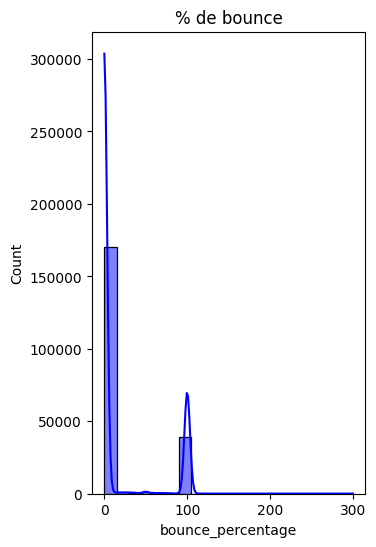

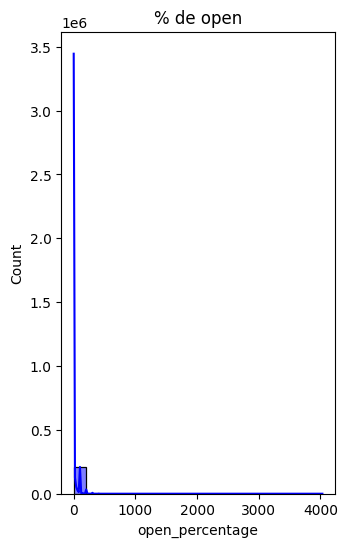

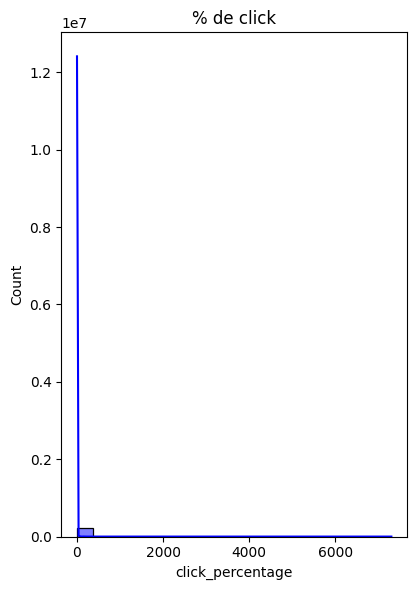

In [14]:
#Histogramas
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
sns.histplot(df["bounce_percentage"], bins=20, kde=True, color = "blue")
plt.title("% de bounce")

plt.figure(figsize=(12,6))
plt.subplot(1,3,2)
sns.histplot(df["open_percentage"], bins=20, kde=True, color = "blue")
plt.title("% de open")

plt.figure(figsize=(12,6))
plt.subplot(1,3,3)
sns.histplot(df["click_percentage"], bins=20, kde=True, color = "blue")
plt.title("% de click")

plt.tight_layout()
plt.show()

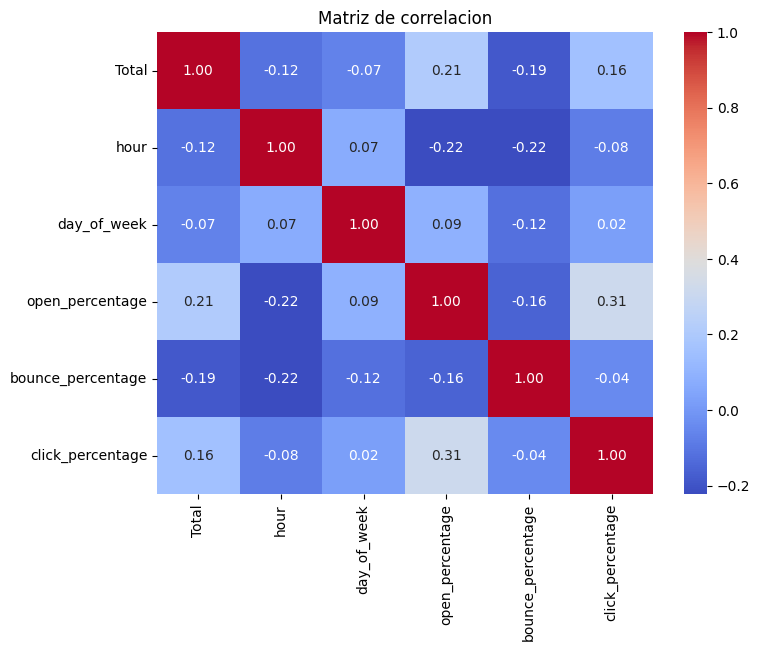

In [16]:
#Matriz de correlacion
variables = ["Total","hour","day_of_week","open_percentage","bounce_percentage","click_percentage"]
plt.figure(figsize=(8,6))
sns.heatmap(df[variables].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlacion")
plt.show()

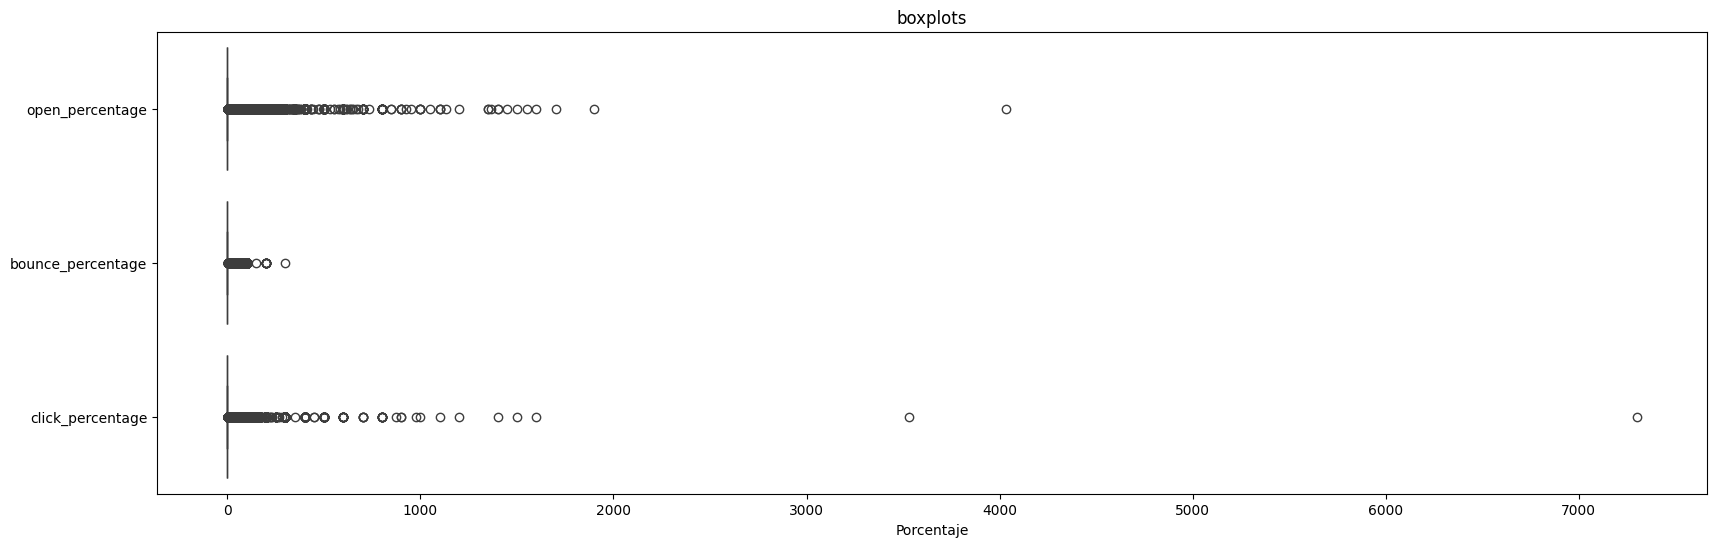

In [20]:
# Boxplots
plt.figure(figsize=(20,6))
sns.boxplot(data=df[["open_percentage","bounce_percentage","click_percentage"]], orient="h")
plt.title("boxplots")
plt.xlabel("Porcentaje")
plt.show()

In [85]:
muestra_1 = df.sample(frac=0.1, random_state=1)

In [86]:
muestra_1

,Id,send,bounce,open,click,Total,Comprador,hour,day_of_week,open_percentage,bounce_percentage,click_percentage
198001,628289,2,0,0,0,2,1,20.000000,1.500,0.0,0.0,0.0
94869,588588,2,0,0,0,2,1,20.000000,1.500,0.0,0.0,0.0
197072,1814229,3,0,0,0,3,1,19.333333,1.000,0.0,0.0,0.0
148589,521538,1,0,0,0,1,1,20.000000,4.000,0.0,0.0,0.0
209170,1142169,1,1,0,0,2,0,23.000000,2.000,0.0,100.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
66458,1332302,2,0,3,0,5,1,14.400000,0.800,150.0,0.0,0.0
3270,1352763,1,0,0,0,1,1,21.000000,0.000,0.0,0.0,0.0
84499,1881875,4,4,0,0,8,0,17.000000,3.500,0.0,100.0,0.0
157940,691027,2,0,0,0,2,1,20.000000,1.500,0.0,0.0,0.0


In [27]:
from scipy.stats import ks_2samp

In [33]:
columnas_numericas_datos = df.select_dtypes(include="number").columns

In [34]:
columnas_numericas_muestra = muestra_1.select_dtypes(include="number").columns

In [35]:
for columna_datos, columna_muestra in zip(columnas_numericas_datos,columnas_numericas_muestra):
  statistic,p_value=ks_2samp(df[columna_datos], muestra_1[columna_muestra])
  print(f"columna:{columna_datos}")
  print(f"estadistico: {statistic}")
  print(f"p-valor: {p_value}")
  print("-----------------------------------------------")

columna:Id
estadistico: 0.004501687712716751
p-valor: 0.8272670918979919
-----------------------------------------------
columna:send
estadistico: 0.003643199070394343
p-valor: 0.9590765966800802
-----------------------------------------------
columna:bounce
estadistico: 0.0007911964227053092
p-valor: 1.0
-----------------------------------------------
columna:open
estadistico: 0.001252500787226274
p-valor: 1.0
-----------------------------------------------
columna:click
estadistico: 0.0015823906265152177
p-valor: 0.9999999998781921
-----------------------------------------------
columna:Total
estadistico: 0.004966951918010443
p-valor: 0.7258166962168782
-----------------------------------------------
columna:Comprador
estadistico: 0.0010091529729110982
p-valor: 1.0
-----------------------------------------------
columna:hour
estadistico: 0.005789533950811665
p-valor: 0.5352470807692755
-----------------------------------------------
columna:day_of_week
estadistico: 0.0048095618935036

In [36]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [87]:
features = ["Total","hour","day_of_week","open_percentage","bounce_percentage","click_percentage", "Comprador"]

In [88]:
scaler = StandardScaler()
df_processed = scaler.fit_transform(muestra_1[features])

In [89]:
def fit_kmeans_and_score(k,data):
  kmeans= KMeans(n_clusters=k, random_state=42)
  kmeans.fit(data)
  inertia_val = kmeans.inertia_
  silhouette_val = silhouette_score(data, kmeans.labels_) if k > 1 else None
  return inertia_val, silhouette_val

In [90]:
k_values = range(2,9)

In [91]:
inertia = []
silhouette_scores = []

In [92]:
for k in k_values:
  inertia_val, silhouette_val = fit_kmeans_and_score(k, df_processed)
  inertia.append(inertia_val)
  silhouette_scores.append(silhouette_val)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [93]:
len(inertia)

7

In [82]:
len(k_values)

7

In [94]:
silhouette_scores

[0.33337672684915237,
 0.35083379256769565,
 0.30351083883823277,
 0.26569404787229056,
 0.3176973030899626,
 0.3630034991569957,
 0.38515857133984255]

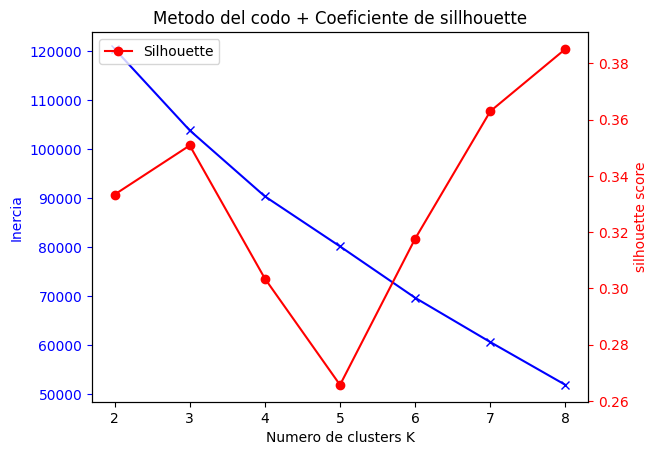

In [95]:
fig, ax1 = plt.subplots()

ax1.plot(k_values, inertia, "bx-", label="Inercia")
ax1.set_xlabel("Numero de clusters K")
ax1.set_ylabel("Inercia", color="b")
ax1.tick_params("y", colors="b")

ax2 = ax1.twinx()
ax2.plot(k_values, silhouette_scores, "ro-", label="Silhouette")
ax2.set_ylabel("silhouette score", color="r")
ax2.tick_params("y", colors="r")

plt.title("Metodo del codo + Coeficiente de sillhouette")
plt.xticks(k_values)
plt.legend()
plt.show()

In [96]:
kmeans = KMeans(n_clusters=6, random_state=1)
kmeans.fit(df_processed)

df_processed= pd.DataFrame(df_processed)

cluster_labels = kmeans.predict(df_processed)
df_processed["Cluster_6"] = cluster_labels

features.append("Cluster_6")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [97]:
df_processed.to_excel("cluster_6.xlsx")

In [99]:
muestra_1.to_excel("muestra_1.xlsx")